<a href="https://colab.research.google.com/github/risper25/whatsappanalysis/blob/main/Whatsappdataviz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#mount drive
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
#install emoji package
!pip install emoji 
!pip install emoji --upgrade

     |████████████████████████████████| 133kB 6.0MB/s 
Requirement already up-to-date: emoji in /usr/local/lib/python3.7/dist-packages (1.2.0)


In [2]:
#imports
import re
import pandas as pd
import matplotlib.pyplot as plt
import emoji
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
% matplotlib inline

<h1><strong>Data Pre-processing</strong></h1>

In [4]:
#check if line starts with date
def date_first(text):
    try:
        datetime.strptime(text,"%m/%d/%y")
        return True
    except Exception as e:
        return False    

In [5]:
#file directory
chat_dir="/content/gdrive/MyDrive/chat_data.txt"

#open and read file
with open(chat_dir) as f:
    chat_data = f.readlines()

In [6]:
#create a list of  all the lines in the text file 
data=[""]
for line in chat_data:
    if date_first(line.split(',')[0]):
        data.append(line.strip("\n"))
    else:
        data[len(data)-1] += " " + line.strip('\n')
#display the data list
data[1:3]        

['2/21/19, 07:50 - You were added',
 '5/8/20, 11:26 - Kevin Oyanda: <Media omitted>']

In [7]:
#extract date
dates=[]
text2=[]
for chat in data:
    date=re.split("\s",chat,1)
    dates.append(date[0].split(",")[0])
    text2.append(date[1])
dates[:3]
text2[3]

'11:27 - Shadi: 😂😂😂😂😂😂Pia unataka tubelieve hii'

In [8]:
#extract time
times=[]
text3=[]
for chat in text2:
    time = re.split("-",chat,1)
    times.append(time[0])
    text3.append(time[1])
print(times[:6])
text3[5]   

['\ufeff2/21/19, 07:50 ', '07:50 ', '11:26 ', '11:27 ', '11:32 ', '15:13 ']


' Jemo: 😂sisemi'

In [9]:
#extract author
authors=[]
text4=[]
for chat in text3:
    author = re.split(":\s",chat,1)

    authors.append(author[0].strip())
    text4.append(author[-1])

authors[3]

'Shadi'

In [10]:
#extract message
messages=text4
messages[1:3]

[' You were added', '<Media omitted>']

In [11]:
#create a dataframe
info_tupple=zip(dates,times,authors,messages)
df=pd.DataFrame(info_tupple,columns=['dates','times','authors','messages'])


In [12]:
#replace the unknown authors(authors that have phone numbers as names) with 'anonymous+number' 
number_authors=df.loc[df['authors'].str[0].isin(['+']),'authors']
number_authors=number_authors.unique()
for i,number in enumerate(number_authors):
    df.authors=df.authors.replace(number,'anonymus'+ str(i))
df[1:]    

,dates,times,authors,messages
1,2/21/19,07:50,You were added,You were added
2,5/8/20,11:26,Kevin Oyanda,<Media omitted>
3,5/8/20,11:27,Shadi,😂😂😂😂😂😂Pia unataka tubelieve hii
4,5/8/20,11:32,Kevin Oyanda,😂yeah I just spoke to him yesternight and he c...
5,5/8/20,15:13,Jemo,😂sisemi
...,...,...,...,...
1878,1/3/21,17:45,anonymus10,Sen. Ledama Olekina (@ledamalekina) Tweeted: *...
1879,1/5/21,11:36,Jakie,The University of Pennsylvania Center for Lear...
1880,1/5/21,13:52,Davi Odinga,Jessica Rose (@jesslynnrose) Tweeted: Tech hir...
1881,1/5/21,14:10,anonymus12,Triplebyte run engineering interviews without ...


In [14]:
#delete rows that contain authors that were 
#removed,added,created group,changed and left.


added=df[~df.authors.str.contains("added")== False]
removed=df[~df.authors.str.contains("removed")== False]
left=df[~df.authors.str.contains("left")== False]
changed=df[~df.authors.str.contains("changed")== False]
created=df[~df.authors.str.contains("created")== False]
joined=df[~df.authors.str.contains("joined")== False]
media=df[~df.messages.str.contains("<Media omitted>")== False]
you_deleted=df[~df.messages.str.contains("You deleted this message")== False]
deleted=df[~df.messages.str.contains("This message was deleted")== False]
drops=[added,removed,left,changed,created,joined,media,you_deleted,deleted]

for d in drops:
    df=df.drop(d.index,axis=0)

df[1:]

,dates,times,authors,messages
3,5/8/20,11:27,Shadi,😂😂😂😂😂😂Pia unataka tubelieve hii
4,5/8/20,11:32,Kevin Oyanda,😂yeah I just spoke to him yesternight and he c...
5,5/8/20,15:13,Jemo,😂sisemi
6,5/8/20,17:05,Jano,Mimi nimebelieve🤜
7,5/8/20,17:08,Msembi,Students come from all parts of the country so...
...,...,...,...,...
1878,1/3/21,17:45,anonymus10,Sen. Ledama Olekina (@ledamalekina) Tweeted: *...
1879,1/5/21,11:36,Jakie,The University of Pennsylvania Center for Lear...
1880,1/5/21,13:52,Davi Odinga,Jessica Rose (@jesslynnrose) Tweeted: Tech hir...
1881,1/5/21,14:10,anonymus12,Triplebyte run engineering interviews without ...


In [15]:
#only take the authors first name 
df.authors=df.authors.str.split(" ",n=1,expand=True)
df[1:13]

,dates,times,authors,messages
3,5/8/20,11:27,Shadi,😂😂😂😂😂😂Pia unataka tubelieve hii
4,5/8/20,11:32,Kevin,😂yeah I just spoke to him yesternight and he c...
5,5/8/20,15:13,Jemo,😂sisemi
6,5/8/20,17:05,Jano,Mimi nimebelieve🤜
7,5/8/20,17:08,Msembi,Students come from all parts of the country so...
8,5/8/20,20:19,Davi,😂😂
9,5/8/20,20:45,Jakie,😂😂😂
11,5/9/20,22:32,anonymus1,😂😂😂😂😂😂😂😂
12,5/9/20,22:34,Msembi,😂😂😂😂
13,5/9/20,22:34,Basam,🌚🌚🌚


In [16]:
#messages that were deleted
#deleted=df[~df.messages.str.contains("This message was deleted")== False]
deleted[:9]

,dates,times,authors,messages
125,6/3/20,19:56,Basam,This message was deleted
205,6/11/20,23:47,Anastasia,This message was deleted
238,6/15/20,16:00,Msembi,This message was deleted
272,6/20/20,08:49,Msembi,This message was deleted
280,6/20/20,18:49,Steve Oyeyo,This message was deleted
397,7/6/20,21:18,Msembi,This message was deleted
459,7/15/20,14:18,Doris,This message was deleted
461,7/15/20,14:20,Basam,This message was deleted
490,7/16/20,16:29,Basam,This message was deleted


<h1><strong>ANALYSIS</strong></h1>

In [17]:
#wordcloud
#top authors whosent messages
#authors who deleted the most of their messages
#Authors who sent the lengthiest messages.

In [18]:
#remove emojies
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')



In [19]:
import string
#join all the messages
out=' '.join(df['messages'])
#remove emojies

#remove punctuations
out=''.join([w.lower() for w in out if w not in string.punctuation])
#remove emoji
out=deEmojify(out)




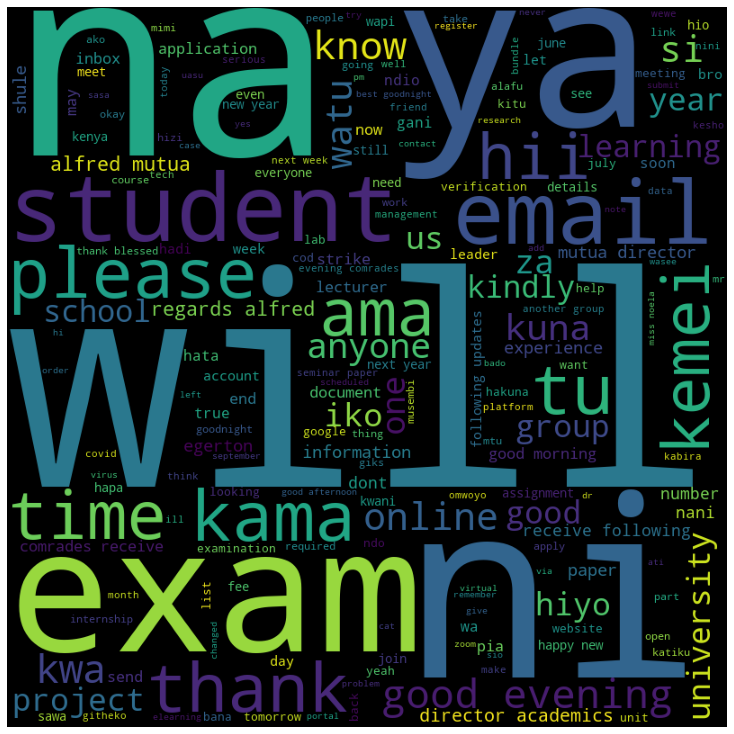

In [20]:
from wordcloud import WordCloud, STOPWORDS
#word cloud
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(out)
  
# plot the WordCloud image                       
plt.figure(figsize = (10, 16), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()


In [21]:
def bar_graph(data_y,data_x,graph_title,y_label,x_label):
    plt.figure()
    sns.barplot(data_y,data_x)
    plt.title(graph_title)
    plt.ylabel(y_label, fontsize=12)
    plt.xlabel(x_label, fontsize=12)
    plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


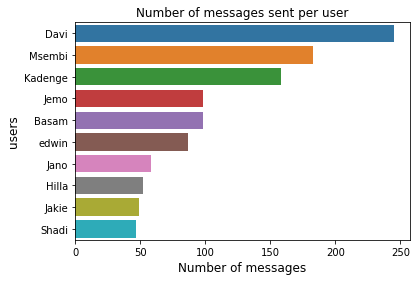

In [22]:

#number of messages sent per user
mes2=df.authors.value_counts()[:10]
mes2
bar_graph(mes2.values,mes2.index,'Number of messages sent per user','users','Number of messages')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


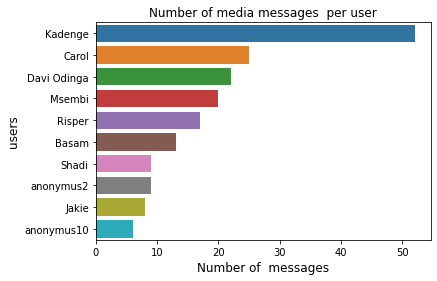

In [24]:
#authors who sent the many media files 
mes3=media.authors.value_counts()[:10]
bar_graph(mes3.values,mes3.index,'Number of media messages  per user','users','Number of  messages')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


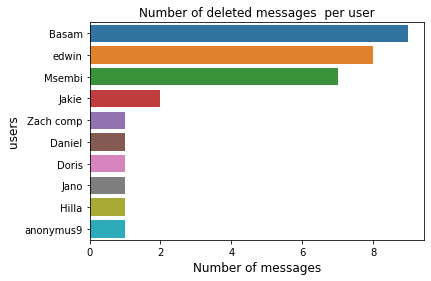

In [25]:
#authors who deleted most of their messages
mes4=deleted.authors.value_counts()[:10]
bar_graph(mes4.values,mes4.index,'Number of deleted messages  per user','users','Number of messages')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


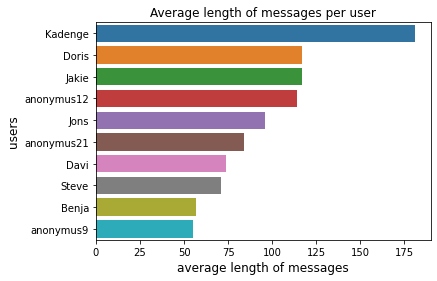

In [26]:
#length of messages
df['length']=df.messages.apply(lambda x: len(x))
lens=df.groupby(['authors']).length
authors=df.authors.unique()
average_len={name:round(lens.get_group(name).mean()) for name in authors}
average_len=pd.DataFrame(average_len.items(),columns=['author','avg'])
average_len= average_len.sort_values(by=['avg'],ascending=False)

bar_graph(average_len[:10].avg.values,average_len[:10].author.values,'Average length of messages per user','users','average length of messages')


[(0.0, 23.0)]

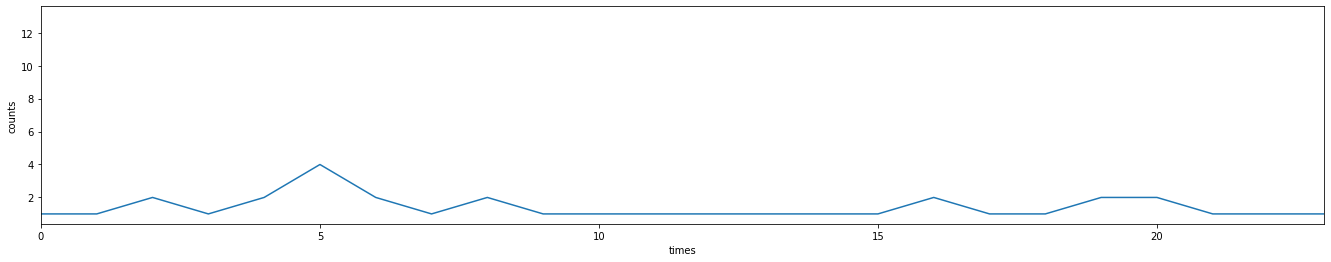

In [27]:
#messages sent during times of the day
new_df=df.sort_values('times')
tim=dict(new_df.times.value_counts())
tim=pd.DataFrame(tim.items(),columns=['times','counts'])
tim=tim.sort_values(by=['times'],ascending=True)

# create the time series plot 
fig,ax = plt.subplots(figsize=(23,4))
sns.lineplot(x =tim.times , y = tim.counts, ax=ax,data = tim) 
ax.set_xscale('linear')
ax.set(xlim=(0, 23))
  

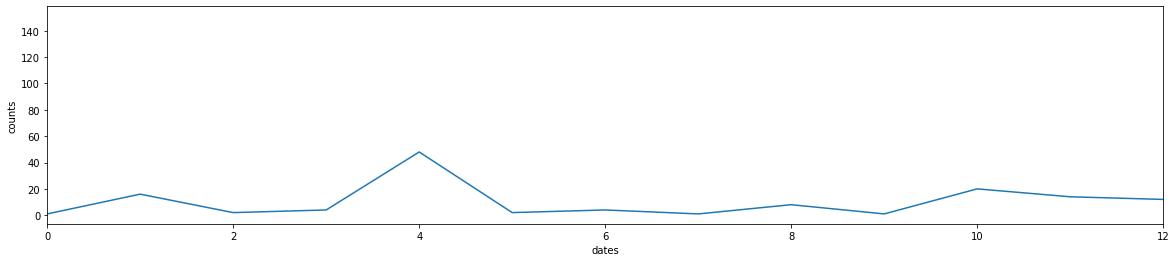

In [29]:
#messages sent during times of the day
new_df=df.sort_values('times')
tim=dict(new_df.dates.value_counts())
tim=pd.DataFrame(tim.items(),columns=['dates','counts'])
tim=tim.sort_values(by=['dates'],ascending=True)

# create the time series plot 
fig,ax = plt.subplots(figsize=(20,4))
sns.lineplot(x =tim.dates , y = tim.counts, ax=ax,data = tim) 
ax.set(xlim=(0, 12))
ax.set_xscale('linear')